In [1]:
import numpy as np
import torch as th
import torchvision
import blobfile as bf
import PIL
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


In [2]:
def _list_image_files_recursively(data_dir):
    results = []
    for entry in sorted(bf.listdir(data_dir)):
        full_path = bf.join(data_dir, entry)
        ext = entry.split(".")[-1]
        if "." in entry and ext.lower() in ["jpg", "jpeg", "png", "gif"]:
            results.append(full_path)
        elif bf.isdir(full_path):
            results.extend(_list_image_files_recursively(full_path))
    return results

def get_image(path):
    with bf.BlobFile(path, "rb") as f:
        pil_image = PIL.Image.open(f)
        pil_image.load()
    pil_image = pil_image.convert("RGB")
    image = pil_image.resize((64, 64), PIL.Image.ANTIALIAS)
    image = np.array(image)
    # image = (image / 127.5) - 1

    return image

plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(30, 30))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


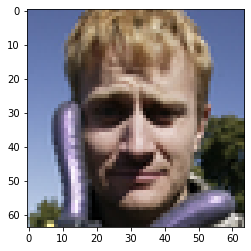

Sigma list :  [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5]
tensor(1., dtype=torch.float64)
tensor(-1., dtype=torch.float64)


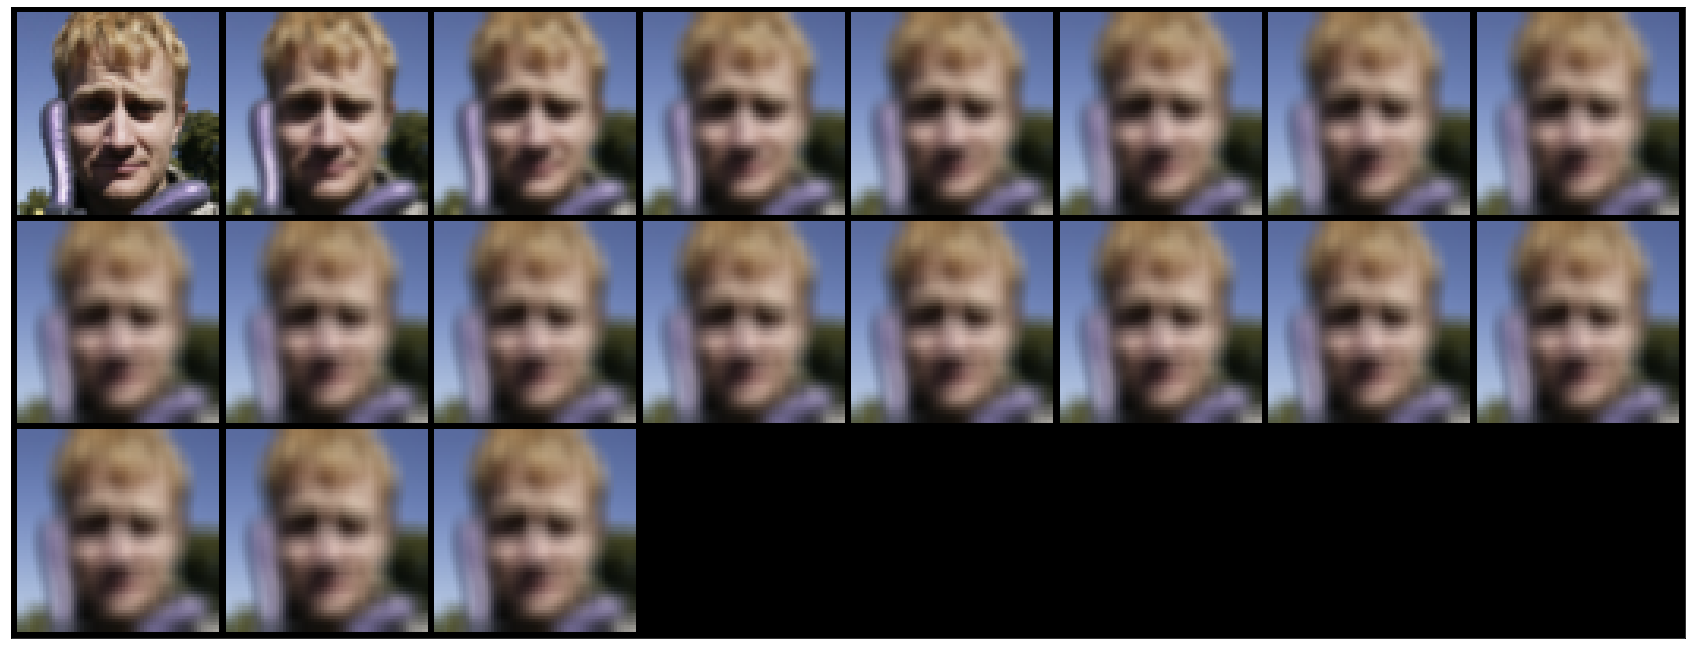

In [4]:
set_ = 'valid'
data_dir = f'/data/mint/ffhq_256_with_anno/ffhq_256/{set_}'
images = _list_image_files_recursively(data_dir)

image_dict = {}
for path in images:
    img_name = path.split('/')[-1]
    image_dict[img_name] = path

img = get_image(image_dict['60065.jpg'])
plt.imshow(img)
plt.show()
k = int(img.shape[0] * 0.1)
k = k if k%2 != 0 else k+1
img = np.transpose(img, axes=(2, 0, 1))

blur_imgs = []
sigma_list = np.arange(0.5, 10, 0.5)
for sigma in sigma_list:
    blur_kernel = torchvision.transforms.GaussianBlur(kernel_size=k, sigma=sigma)
    blur_img = blur_kernel(th.tensor(img))

    blur_imgs.append(blur_img)

print("Sigma list : ", sigma_list)
grid = torchvision.utils.make_grid(th.stack(blur_imgs, dim=0))
show(grid)

norm = torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
print(th.max(norm(th.tensor(img/255))))
print(th.min(norm(th.tensor(img/255))))
